In [25]:
import seaborn as sns
from pydataset import data
import pandas as pd
from pandas import DataFrame
import acquire1
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [26]:
iris = data('iris')

In [27]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [28]:
#print the first 3 rows
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [29]:
#print the number of rows and columns (shape)
iris.shape

(150, 5)

In [30]:
#print the data type of each column
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [31]:
#print the summary statistics for each of the numeric variables. Would you recommend 
#rescaling the data based on these statistics? 
#rescaling means normalize the data within a particular range, I don't think they need to be 
# rescaled because they seem to be in a normalized range.
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.


In [32]:
#read the csv file and name it df_excel as instructed
df_excel = pd.read_csv("Telco.csv")

In [33]:
#show me the dataframe
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No


In [34]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


In [35]:
#print the number of rows of your original dataframe
df_excel.shape[0]

7049

In [36]:
#print the first 5 column names
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [37]:
#print the column names that have a data type of object
df_excel.select_dtypes

<bound method DataFrame.select_dtypes of      customer_id  gender  is_senior_citizen partner dependents  phone_service  \
0     0002-ORFBO  Female                  0     Yes        Yes              1   
1     0003-MKNFE    Male                  0      No         No              2   
2     0004-TLHLJ    Male                  0      No         No              1   
3     0011-IGKFF    Male                  1     Yes         No              1   
4     0013-EXCHZ  Female                  1     Yes         No              1   
...          ...     ...                ...     ...        ...            ...   
7044  9987-LUTYD  Female                  0      No         No              1   
7045  9992-RRAMN    Male                  0     Yes         No              2   
7046  9992-UJOEL    Male                  0      No         No              1   
7047  9993-LHIEB    Male                  0     Yes        Yes              1   
7048  9995-HOTOH    Male                  0     Yes        Yes      

In [38]:
#print the summary statistics for each of the numeric variables
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


In [39]:
#print the unique values for each of your categorical variables
df_excel.nunique()

customer_id          7043
gender                  2
is_senior_citizen       2
partner                 2
dependents              2
phone_service           3
internet_service        3
contract_type           3
payment_type            4
monthly_charges      1585
total_charges        6530
churn                   2
dtype: int64

3. Read the data from this google sheet into a dataframe, df_google

In [40]:
df_google = pd.read_csv("googlesheets.csv")

In [41]:
df_google

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
#print the first 3 rows
print(df_google.iloc[:3])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [43]:
#print the number of rows and columns
df_google.shape

(891, 12)

In [44]:
#print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
#print the data type of each column
df_google.dtypes.T

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
#print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
#print the unique values for each of your categorical variables

df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [48]:
######################################################## PREPARE

In [49]:
import env

In [50]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df


def get_iris_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

In [51]:
df= acquire1.get_iris_data()

In [52]:
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [53]:
#Drop the species_id and (this one wasn't there to drop)measurement_id columns.
df = df.drop(columns = ['species_id'])

In [54]:
df

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [55]:
#Rename the species_name column to just species.
df.rename(columns={'species_name': 'species'}, inplace=True)


In [56]:
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [57]:
#Create dummy variables of the species name.
# use pd.get_dummies. Returns a dataframe
df_dummy = pd.get_dummies(df[['species']]) #drop_first=[True] if I want to whittle down columns to only the necessary

df_dummy.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [58]:
df= pd.concat([df, df_dummy], axis = 1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [59]:
#Create a function named prep_iris that accepts the untransformed iris data, and returns 
#the data with the transformations above applied.
def prep_iris(iris_db):
    df= acquire1.get_iris_data()
    df = df.drop(columns = ['species_id'])    
    df.rename(columns={'species_name': 'species'}, inplace=True)    
    df_dummy = pd.get_dummies(df[['species']])
    df= pd.concat([df, df_dummy], axis = 1)  
    return df

In [60]:
########################### PRACTICE

In [61]:
#read the csv file and name it df_telco to practice with
df_telco = pd.read_csv("Telco.csv")

In [62]:
#Clean data

In [63]:
#determine what columns to drop, no use for customer_id
df_telco = df_telco.drop(columns= "customer_id")

In [64]:
#Check to make sure customer_id column was dropped
df_telco.columns

Index(['gender', 'is_senior_citizen', 'partner', 'dependents', 'phone_service',
       'internet_service', 'contract_type', 'payment_type', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [65]:
df_telco.shape

(7049, 11)

In [66]:
#drop any duplicates
df_telco = df_telco.drop_duplicates()

In [67]:
#check to see if any duplicates were dropped
df_telco.shape

(7009, 11)

In [68]:
#Check for null values to determine which columns to drop or nulls to replace
df_telco.isnull().sum()

gender                0
is_senior_citizen     0
partner               0
dependents            0
phone_service         0
internet_service      0
contract_type         0
payment_type          0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

In [69]:
# Find the average monthly charge to replace null values
df_telco.total_charges.mean()

2294.2429908545278

In [70]:
# Replace null values with average monthly charge
df_telco.fillna(value = 2283.30, inplace = True)

In [71]:
#Check to see if null values are now filled with the average
df_telco.isnull().sum()

gender               0
is_senior_citizen    0
partner              0
dependents           0
phone_service        0
internet_service     0
contract_type        0
payment_type         0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [72]:
df_telco.head(20)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


In [73]:
#Get dummy values dependents and churn columns; unnecessary columns
dummy_df = pd.get_dummies(df_telco[['dependents','churn']], dummy_na=False, drop_first=[True,True])
dummy_df.head()

,dependents_Yes,churn_Yes
0,1,0
1,0,0
2,0,1
3,0,1
4,0,1


In [74]:
#attach the dummy columns to the main df
df_telco = pd.concat([df_telco,dummy_df], axis=1)
df_telco.head(1)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,dependents_Yes,churn_Yes
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.3,No,1,0


In [75]:
#this one didn't work but not sure why

#drop the columns we just make dummy columns for
dropping = ['dependents','churn']
df_telco.drop(columns= dropping)
df_telco.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,dependents_Yes,churn_Yes
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,1,0
1,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,0,0
2,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,0,1
3,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,0,1
4,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,0,1


In [76]:
#time to train, validate, test, split

In [77]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df_telco, test_size=.2, random_state=123, stratify=df_telco.churn_Yes)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)

In [78]:
#validate the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3924, 13)
validate -> (1683, 13)
test -> (1402, 13)


In [79]:
# creating a function that will train, validate and split data when a df in input
def split_data(df_telco):
    train, test = train_test_split(df_telco, test_size=.2, random_state=123, stratify=df_telco.churn_Yes)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)
    return train, validate, test

In [80]:
#test the function
train, validate, test = split_data(df_telco)

In [81]:
#validate the split

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3924, 13)
validate -> (1683, 13)
test -> (1402, 13)


In [82]:
################################## EXPLORATORY DATA ANALYSIS

In [83]:
# ACQUIRE

In [84]:
from env import get_connection

In [3]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df


In [85]:
new_iris_data().head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [86]:
def access_iris_data():
    '''
    This function reads the iris data from SQL
    '''
    sql_query = """
                SELECT *
                FROM measurements
                JOIN species USING(species_id);
                """
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [87]:
iris_df =access_iris_data()

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, target, cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, target, quant)

def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()
    plot_all_continuous_vars(train, target, quant_vars)
    plt.show()    


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
    p = plot_cat_by_target(train, target, cat_var)

    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

def plot_cat_by_target(train, target, cat_var):
    p = plt.figure(figsize=(2,2))
    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
    overall_rate = train[target].mean()
    p = plt.axhline(overall_rate, ls='--', color='gray')
    return p


## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)


### Multivariate

def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing the target variable. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()

def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()



In [89]:
#PREPARE

In [90]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [91]:
#drop unnecessary column
#iris_df = iris_df.drop(columns = ['species_id'])
iris_df = iris_df.drop(columns = ['measurement_id'])

In [92]:
iris_df.head()

,species_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,1,4.7,3.2,1.3,0.2,setosa
3,1,4.6,3.1,1.5,0.2,setosa
4,1,5.0,3.6,1.4,0.2,setosa


In [93]:
# sample 
#rename df.rename(columns={'species_name': 'species'}, inplace=True)
iris_df.rename(columns={'species_name':'species'}, inplace=True)

In [94]:
# create dummy columns
df_dummy = pd.get_dummies(iris_df[['species']]) #drop_first=[True] if I want to whittle down columns to only the necessary

df_dummy.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [95]:
#add this df to the original
iris_df= pd.concat([iris_df, df_dummy], axis = 1)
iris_df.head()

,species_id,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,1,5.1,3.5,1.4,0.2,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,1,4.7,3.2,1.3,0.2,setosa,1,0,0
3,1,4.6,3.1,1.5,0.2,setosa,1,0,0
4,1,5.0,3.6,1.4,0.2,setosa,1,0,0


In [96]:
iris_df

,species_id,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,1,5.1,3.5,1.4,0.2,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,1,4.7,3.2,1.3,0.2,setosa,1,0,0
3,1,4.6,3.1,1.5,0.2,setosa,1,0,0
4,1,5.0,3.6,1.4,0.2,setosa,1,0,0
5,1,5.4,3.9,1.7,0.4,setosa,1,0,0
6,1,4.6,3.4,1.4,0.3,setosa,1,0,0
7,1,5.0,3.4,1.5,0.2,setosa,1,0,0
8,1,4.4,2.9,1.4,0.2,setosa,1,0,0
9,1,4.9,3.1,1.5,0.1,setosa,1,0,0


In [97]:
#this tells me there are no null values
iris_df.isnull().sum()

species_id            0
sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
species               0
species_setosa        0
species_versicolor    0
species_virginica     0
dtype: int64

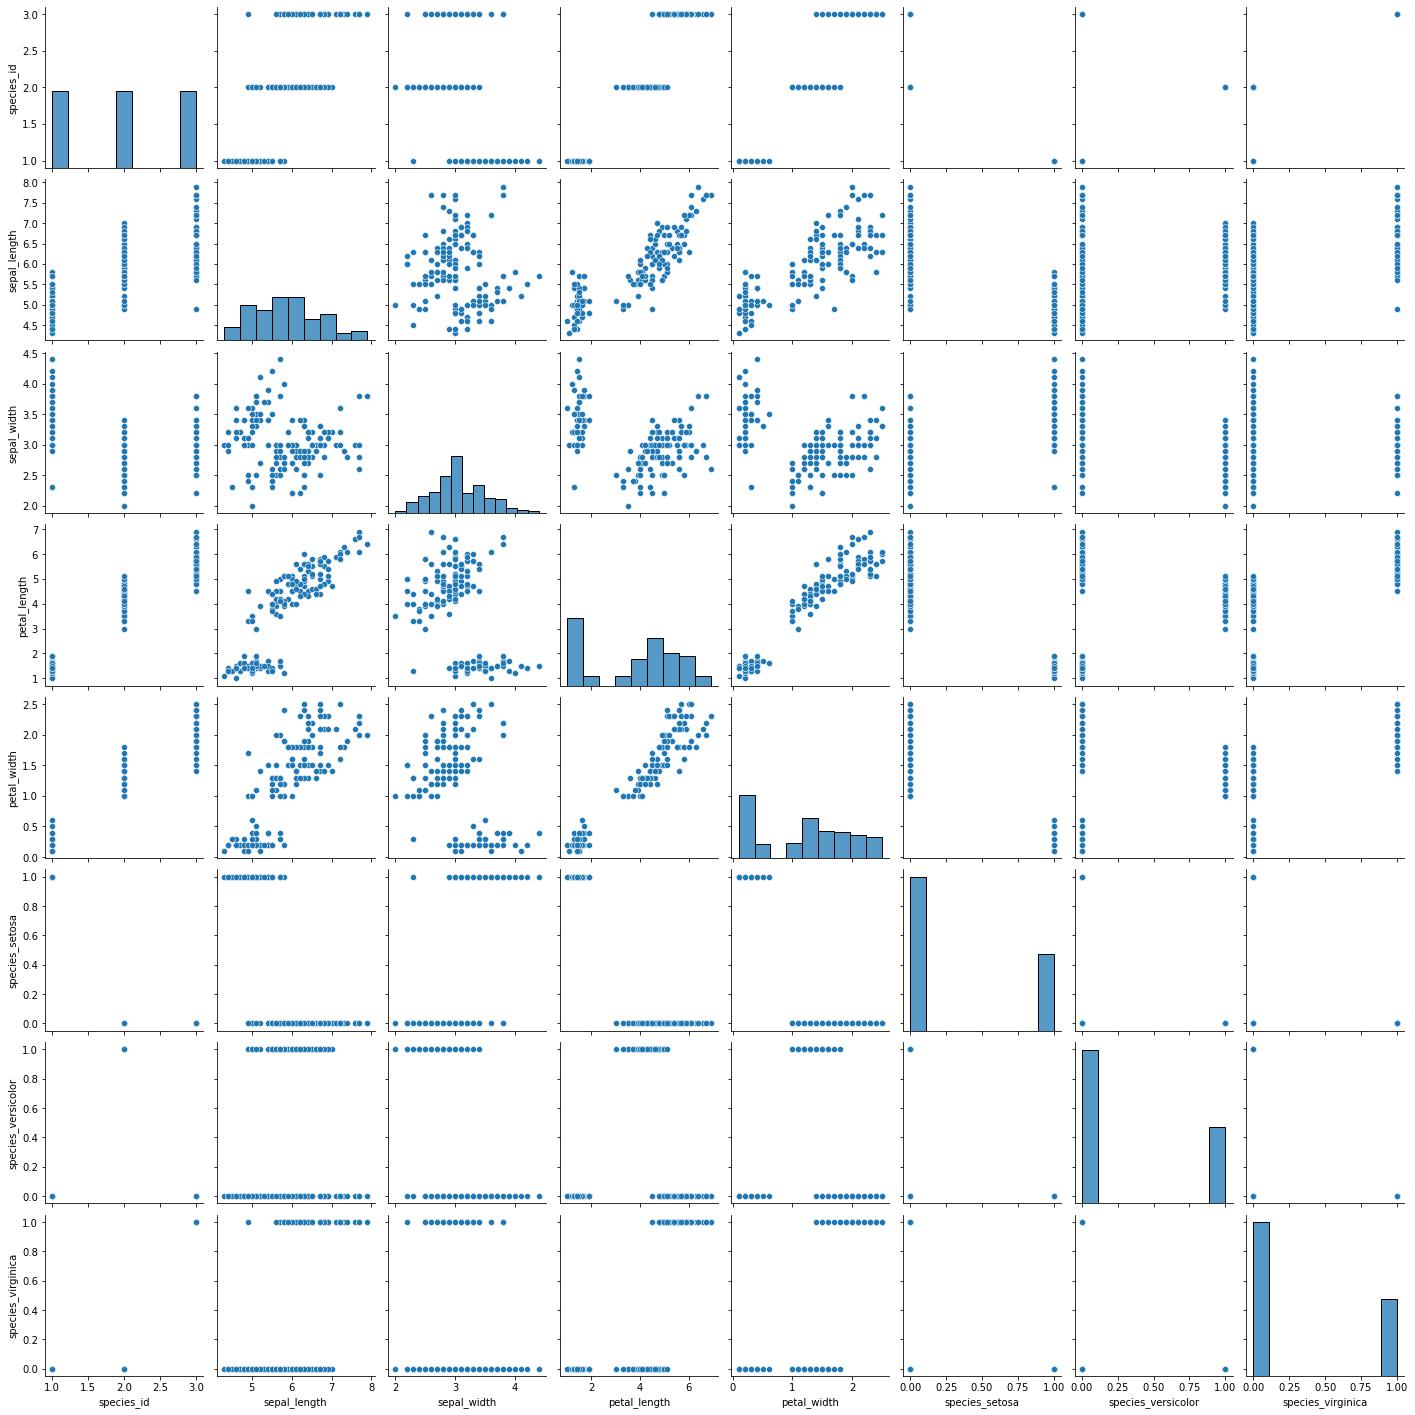

In [98]:
#plot
sns.pairplot(iris_df)

In [99]:
#split the dataframe
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(iris_df, test_size=.2, random_state=123, stratify=iris_df.species)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [100]:
#validate the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (84, 9)
validate -> (36, 9)
test -> (30, 9)


In [101]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'petal_length','sepal_width','petal_width']

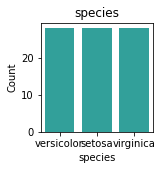

               species  Count  Percent
setosa      versicolor     28    33.33
virginica       setosa     28    33.33
versicolor   virginica     28    33.33
_________________________________________________________________


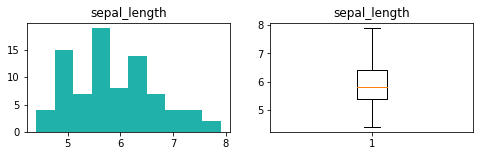

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


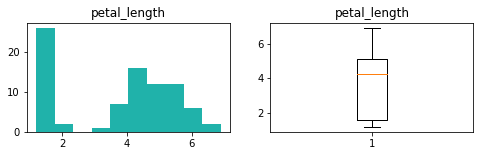

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


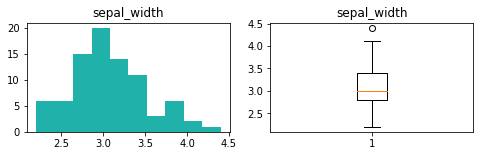

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


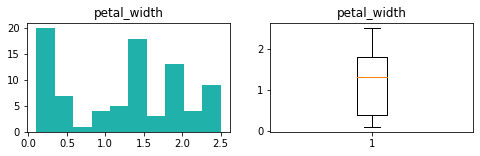

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [102]:
explore_univariate(train, cat_vars, quant_vars)

species 
_____________________

    chi2       p-value  degrees of freedom
0  168.0  2.809846e-35                   4

observed:
 species_id   1   2   3  All
species                    
setosa      28   0   0   28
versicolor   0  28   0   28
virginica    0   0  28   28
All         28  28  28   84

expected:
           0         1         2
0  9.333333  9.333333  9.333333
1  9.333333  9.333333  9.333333
2  9.333333  9.333333  9.333333


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


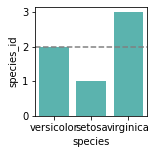


_____________________

sepal_length 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


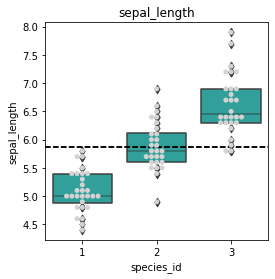

            count      mean       std  min    25%   50%    75%  max
species_id                                                         
1            28.0  5.089286  0.360390  4.4  4.875  5.00  5.400  5.8
2            28.0  5.896429  0.425556  4.9  5.600  5.80  6.125  6.9
3            28.0  6.625000  0.532378  5.8  6.300  6.45  6.900  7.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_length 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


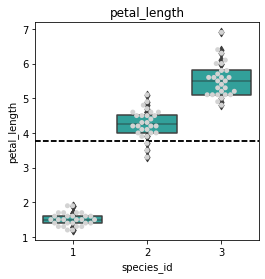

            count      mean       std  min  25%   50%    75%  max
species_id                                                       
1            28.0  1.507143  0.184448  1.2  1.4  1.50  1.600  1.9
2            28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1
3            28.0  5.535714  0.496815  4.8  5.1  5.50  5.800  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

sepal_width 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


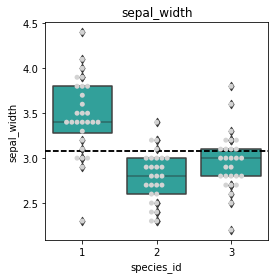

            count      mean       std  min    25%  50%  75%  max
species_id                                                      
1            28.0  3.467857  0.427788  2.3  3.275  3.4  3.8  4.4
2            28.0  2.796429  0.280848  2.3  2.600  2.8  3.0  3.4
3            28.0  2.960714  0.318956  2.2  2.800  3.0  3.1  3.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_width 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


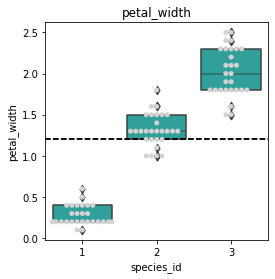

            count      mean       std  min  25%  50%  75%  max
species_id                                                    
1            28.0  0.275000  0.120570  0.1  0.2  0.2  0.4  0.6
2            28.0  1.314286  0.199470  1.0  1.2  1.3  1.5  1.8
3            28.0  2.021429  0.293582  1.5  1.8  2.0  2.3  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [103]:
#Bivariate
explore_bivariate(train, 'species_id', cat_vars, quant_vars)

In [ ]:
#Mulitvariate
explore_multivariate(train, 'species_id', cat_vars, quant_vars)

#PRACTICE EXPLORATION WITH TELCO DATA (previously prepared above the iris_df exercises)